## ROC
* 수신자 판단 곡선(receiver operation characteristc)
* 세계 2차대전 통신장비 성능평가를 위해 고안된 수치
    + 레이더데이터를 분석해서 적 항공기와 신호소음을 구분
    + 수신기의 감도가 증가함에 따라 거짓긍정(특이성)의 수가 감소
* 의학분야에 많이 사용되지만 머신러닝의 이진분류 모델 성능 평가에도 사용
* ROC 곡선의 y축은 민감도, x축은 1-재현율로 그림
* 모델이 양성/긍정으로 예측했을 때 얼마나 잘 맞추고 있는지 설명

### 타이타닉 데이터셋을 로지스틱 회귀로 분석한 후 특이도/재현율을 구한 다음 ROC그래프 그리기

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [12]:
titanic = pd.read_csv('data/titanic.csv')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,life,seat,port
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,live,1st,southampthon
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,live,1st,southampthon
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,dead,1st,southampthon
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,dead,1st,southampthon
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,dead,1st,southampthon


In [13]:
titanic['gender'] = titanic['sex'].apply(lambda x: 0 if x == 'female' else 1)

In [14]:
titanic['harbor'] = titanic['embarked'].apply(lambda x: 0 if x == 'C' else (1 if x == 'S' else 2))

In [15]:
data = titanic.iloc[:,[0, 4, 5, 6, 8, 13, 14]]
target = titanic.survived

In [17]:
titanic.to_csv('data/titanic3.csv', index=False)

In [20]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, train_size=0.7, random_state=2111050955)

In [21]:
lrclf = LogisticRegression()
lrclf.fit(Xtrain, ytrain)

/opt/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [22]:
pred = lrclf.predict(Xtest)

In [24]:
accuracy_score(ytest, pred)

0.7780612244897959

### 분류 알고리즘 종류
* 판별함수 모령
    + 주어진 데이터를 범주에 따라 서로 다른 영역으로 나누는 경계면을 찾아낸 후 이 경계면을 기준으로 데이터가 어디에 속하는지 계산하는 함수 이용
* 확률적 판별/생성 모형
    + 주어진 데이터의 각 범주/레이블이 정답일 조건부확률 계산법에 따라 조건부함수를 추정하거나 베이즈 정리를 사용해서 분류하는 모형
* 분류기의 예측 불확실성을 추정하려면 scikit-learn에서 제공하는 2가지 함수 사용
#### predict / predict_proba

### 타이타닉 생존 예측확률 알아보기 1

In [26]:
Xtest[:5]

,pclass,age,sibsp,parch,fare,gender,harbor
332,2,28.000000,0,0,10.50,1,1
164,1,35.000000,0,0,26.55,1,0
1289,3,29.881135,0,0,7.55,1,1
1279,3,29.881135,0,0,8.05,1,1
1001,3,29.881135,2,0,23.25,1,2


In [27]:
lrclf.predict(Xtest[:5])  # 예측결과는 이산형 값으로 출력

array([0, 0, 0, 0, 0])

### 타이타닉 생존 예측확률 알아보기 2

In [31]:
lrclf.predict_proba(Xtest[:5]) # 예측결과는 확률수치로 출력

array([[0.75907372, 0.24092628],
       [0.53317206, 0.46682794],
       [0.90039215, 0.09960785],
       [0.90023582, 0.09976418],
       [0.95356543, 0.04643457]])

### 확률적 판별/생성 모형을 통해 특이도에 따른 재현율의 변화를 살펴봄 

In [34]:
lrclf.predict_proba(Xtest)[:5]


array([[0.75907372, 0.24092628],
       [0.53317206, 0.46682794],
       [0.90039215, 0.09960785],
       [0.90023582, 0.09976418],
       [0.95356543, 0.04643457]])

### 결과에서 negative한 열을 추출함 : 특이도를 알아보기 위함

In [36]:
pred_proba = lrclf.predict_proba(Xtest)[:,1]
pred_proba.shape # 예측확률 건수 -> 392

(392,)

### 실제값, 확률값, 예측값을 하나의 데이터프레임에 작성

In [40]:
df = pd.DataFrame()
df['ytest'] = ytest  # 실제값
df['FP proba'] = pred_proba  # 특이도FP 확률
df['pred'] = pred  # 예측값
df.head()

,ytest,FP proba,pred
332,0,0.240926,0
164,1,0.466828,0
1289,0,0.099608,0
1279,0,0.099764,0
1001,1,0.046435,0


### 각 예측확률별 특이도(1-FPR)와 민감도(TPR), 임계값을 구함
+ 즉, 생존했는데 사망햇다고 예측한 비율과
+ 사망했는데 사망했다고 예측한 비율을 판단할 때의 경계값을 살펴봄

In [41]:
from sklearn.metrics import roc_curve

In [42]:
fprs,tprs, thresholds = roc_curve(ytest, pred_proba)

In [46]:
print('음성판단', fprs[:10], fprs.shape)
print('양성판단', tprs[:10], fprs.shape)

음성판단 [0.         0.00396825 0.00396825 0.00396825 0.00396825 0.00793651
 0.00793651 0.01587302 0.01587302 0.01587302] (147,)
양성판단 [0.         0.         0.24285714 0.25714286 0.27857143 0.28571429
 0.33571429 0.33571429 0.35714286 0.36428571] (147,)


In [53]:
roc = pd.DataFrame({'1-FPR':fprs, 'TPR':tprs, 'Threshold':thresholds})
roc.head()

,1-FPR,TPR,Threshold
0,0.000000,0.000000,1.966147
1,0.003968,0.000000,0.966147
2,0.003968,0.242857,0.815685
3,0.003968,0.257143,0.811800
4,0.003968,0.278571,0.805134


### fpr과 tpr의 수치 시각화

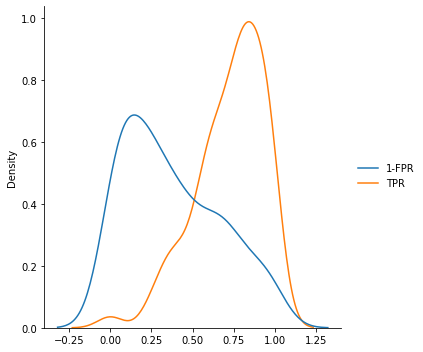

In [54]:
sns.displot(roc.iloc[:, [0,1]], kind='kde')

#### 1-fpr 과 tpr의 수치 시각화
#### TPR 곡선과 1-FPR 곡선이 서로 겹칠수록 분류기의 성능은 떨어짐

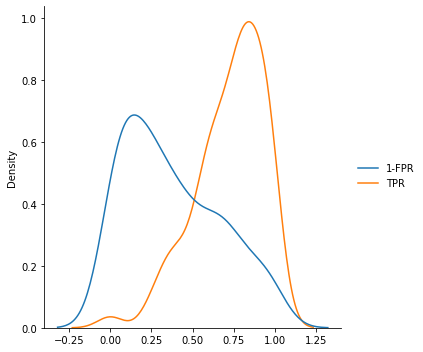

In [55]:
sns.displot(roc.iloc[:, [0,1]], kind='kde')

### 최적의 임계값 살펴보기

In [56]:
optidx = np.argmax(tprs-fprs)
optths = thresholds[optidx]
optths 

36

### ROC 그래프 그림
* 커브가 왼쪽 최상단에 붙을수록 좋은 분류기

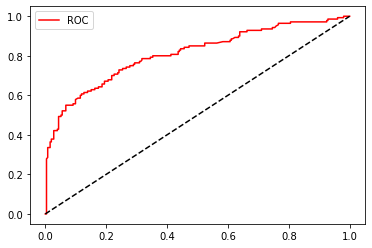

In [58]:
plt.plot(fprs, tprs, 'r', label='ROC')
plt.plot([0,1],[0,1], 'k--')
plt.legend()
# x축이 fpr

### AUC
* 0.7 ~ 0.8 : normal
* 0.8 ~ 0.9 : good
* 0.9 ~ 1 : excellent

In [59]:
from sklearn.metrics import roc_auc_score

In [60]:
roc_auc_score(ytest, pred)

0.7416666666666667

### 사망 건수가 생존에 비해 높기 때문에 모델의 설명력이 높지 않음

<img src='img/thredhold2low.gif'>

<img src='img/thredhold2high.gif'>

<img src='img/thredhold2curve.gif'>

<img src='img/roc2good.gif'>